In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#loading dataset
df = pd.read_csv("climate_action_data.csv")
#basic inspections
print(df.head)

<bound method NDFrame.head of     Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2  

In [34]:
# Check the structure and data types
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      802 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               797 non-null    float64
 3   Soil_pH                        797 non-null    float64
 4   Temperature(C)                 797 non-null    float64
 5   Humidity(%)                    797 non-null    float64
 6   Crop_Type                      798 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  797 non-null    float64
 8   Irrigation_Recommended(mm)     797 non-null    float64
 9   Drone_Image_ID                 802 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.9+ KB

Missing Values Count:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)   

In [43]:
#handle missing values
critical_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)']
df.dropna(subset=critical_cols, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df)

    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
0    SEN-1000  2025-01-01             36.22     6.98            21.3   
1    SEN-1001  2025-01-02             76.55     5.03            23.5   
2    SEN-1002  2025-01-03             61.24     6.52            21.9   
3    SEN-1003  2025-01-04             51.91     6.62            24.0   
4    SEN-1004  2025-01-05             20.92     5.98            19.2   
..        ...         ...               ...      ...             ...   
797  SEN-1797  2027-03-09             49.56     4.78            18.4   
798  SEN-1798  2027-03-10             58.77     4.80            29.0   
799  SEN-1799  2027-03-11             74.57     7.63            28.8   
801  SEN-1510         NaN             52.94     4.78            20.4   
863  SEN-1449  2026-03-26             15.85     6.66            19.4   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
0           50.4  Tomatoes                           67.6   
1           3

In [29]:
#remove duplicates
df.drop_duplicates(inplace=True)
print(df)

    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
797  SEN-1797  2027-03-09            49.56    4.78           18.4        82.6   
798  SEN-1798  2027-03-10            58.77     4.8           29.0        36.2   
799  SEN-1799  2027-03-11            74.57    7.63           28.8        53.6   
801  SEN-1510         NaN            52.94    4.78           20.4        43.8   
863  SEN-1449  2026-03-26            15.85    6.66           19.4        51.5   

    Crop_Type Fertilizer_Re

In [ ]:
#replace error strings with Nan
df.replace('error', np.nan, inplace=True)
print(df)


    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
797  SEN-1797  2027-03-09            49.56    4.78           18.4        82.6   
798  SEN-1798  2027-03-10            58.77     4.8           29.0        36.2   
799  SEN-1799  2027-03-11            74.57    7.63           28.8        53.6   
801  SEN-1510         NaN            52.94    4.78           20.4        43.8   
863  SEN-1449  2026-03-26            15.85    6.66           19.4        51.5   

    Crop_Type Fertilizer_Re

C:\Users\shamillah\AppData\Local\Temp\ipykernel_9912\2430730467.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


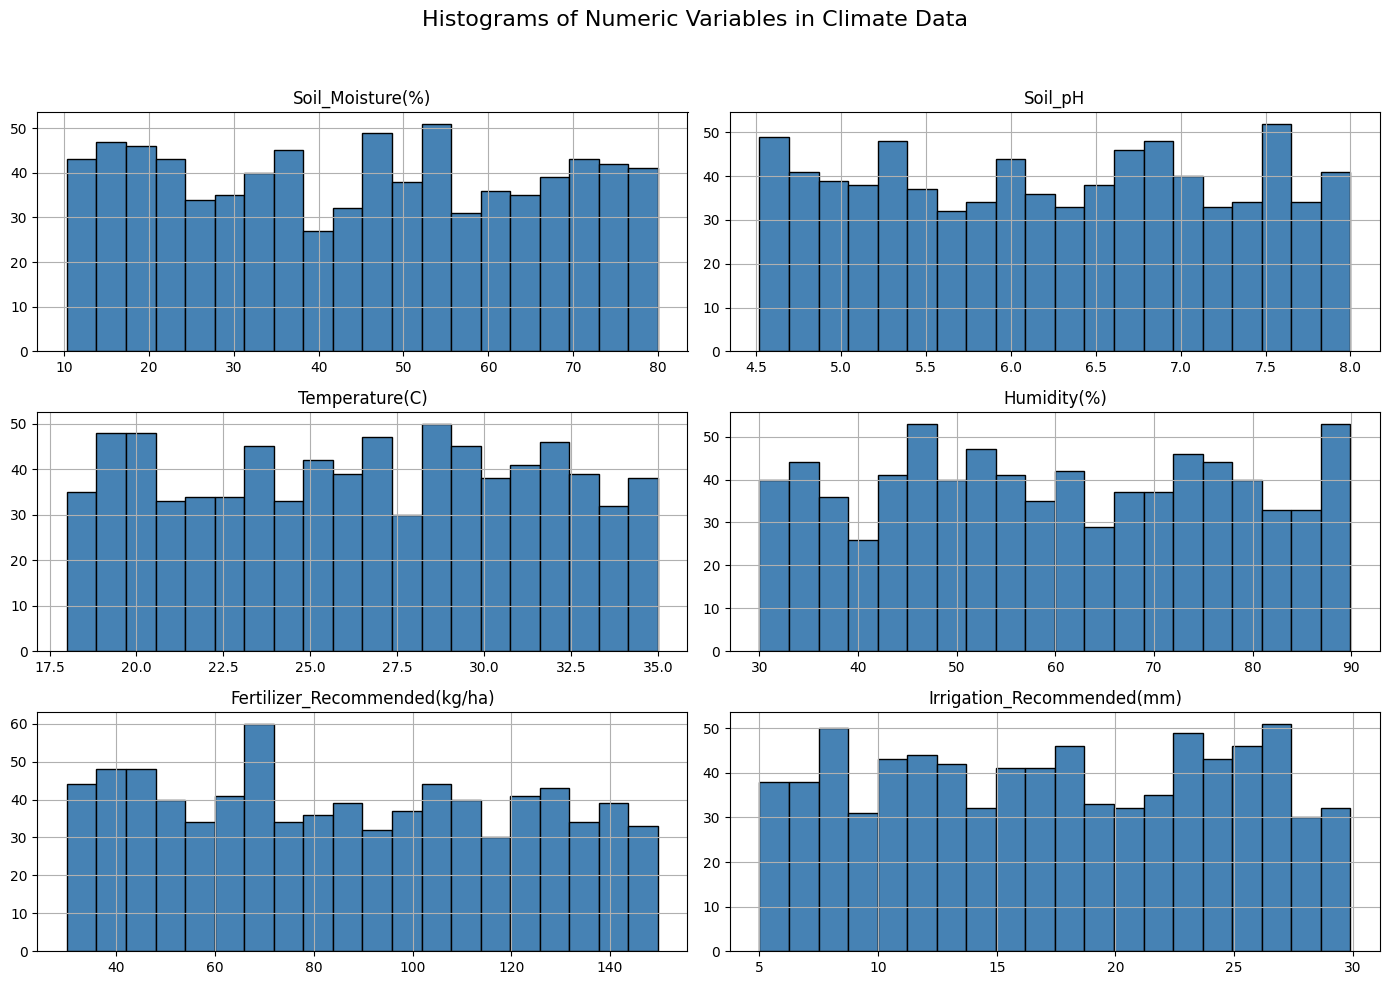

In [ ]:
#Convert columns to numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

#Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

#Drop rows with all NaNs in numeric columns
numeric_df.dropna(axis=0, how='all', inplace=True)

#histograms
numeric_df.hist(bins=20, figsize=(14, 10), edgecolor='black', color='#4682B4')
plt.suptitle('Histograms of Numeric Variables in Climate Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\shamillah\AppData\Local\Temp\ipykernel_9912\2645823878.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


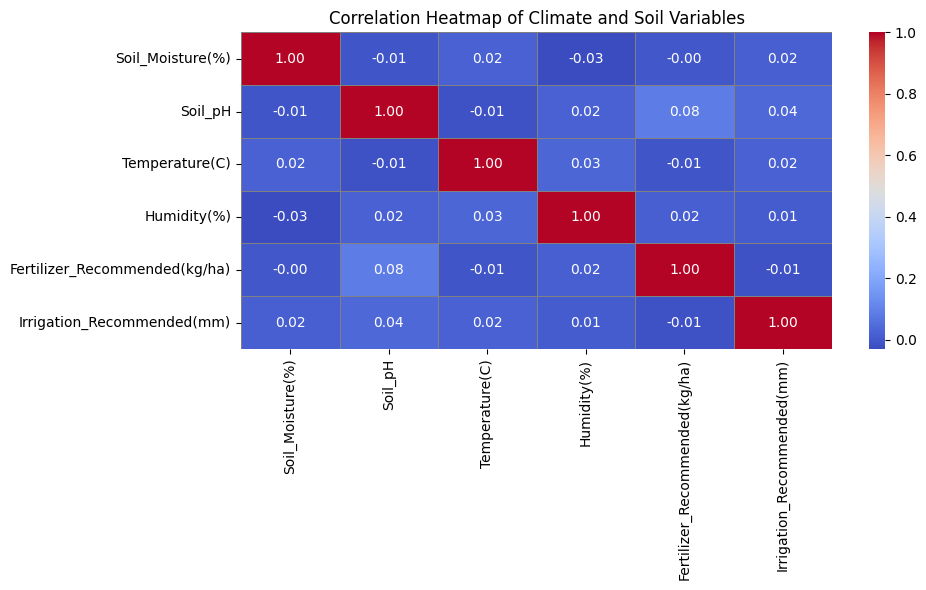

In [33]:
#Try converting all columns to numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# the correlation matrix
corr_matrix = numeric_df.corr()

#Drop rows/columns that are all NaN
corr_matrix.dropna(axis=0, how='all', inplace=True)
corr_matrix.dropna(axis=1, how='all', inplace=True)

#Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap of Climate and Soil Variables')
plt.tight_layout()
plt.show()




In [48]:
#variables most influencing fertilizer recommendation
if 'Fertilizer_Recommended(kg/ha)' in df.columns:
    corr = df.corr(numeric_only=True)['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
    print("\nVariables Most Influencing Fertilizer Recommendation:")
    print(corr)


Variables Most Influencing Fertilizer Recommendation:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083676
Humidity(%)                      0.015300
Soil_Moisture(%)                -0.002757
Temperature(C)                  -0.007206
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [ ]:
 #crop type with highest average soil moisture
if 'Crop_Type' in df.columns:
    avg_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
    top_crop = avg_moisture.idxmax()
    print("\nCrop with Highest Average Soil Moisture:")
    print(f"{top_crop} ({avg_moisture[top_crop]:.2f}%)")


Crop with Highest Average Soil Moisture:
Wheat (47.20%)


In [46]:
#irrigation adjustments for crops with average temperature > 30
if 'Crop_Type' in df.columns:
    high_temp_crops = df[df['Temperature(C)'] > 30]
    avg_temps = high_temp_crops.groupby('Crop_Type')['Temperature(C)'].mean().sort_values(ascending=False)
    
    if not avg_temps.empty:
        print("\nCrops Experiencing Average Temps > 30°C:")
        print(avg_temps)
        print("\nRecommendation: For crops listed above, increase irrigation frequency, monitor soil moisture, and consider shading or mulching.")
    else:
        print("\nNo crops are currently averaging above 30°C.")


Crops Experiencing Average Temps > 30°C:
Crop_Type
Lettuce     32.575676
Wheat       32.528571
Maize       32.430909
Tomatoes    32.404348
Beans       32.311538
Name: Temperature(C), dtype: float64

Recommendation: For crops listed above, increase irrigation frequency, monitor soil moisture, and consider shading or mulching.
